## Parte 3 

### Análisis de componentes no analizados

#### Generacion de archivos con datos no procesados

Se extraen los textos que no han sido procesados:

In [303]:
dfNegativeNo = pd.read_json('dfNegative.json')
dfNegativeNo = dfNegativeNo.dropna()
dfNegativeNo = dfNegativeNo[~dfNegativeNo['tree'].str.contains("Root").fillna(False)]
dfNegativeNo['tree'] =  np.nan
dfNegativeNo.to_json(r'dfNegativeNo.json')

,date,info,text,diagnose,word_count_text,char_count_text,avg_word_text,stopwords_text,percentage_stopwords,tree
0,2015-07-22 04:10:12,reddit post,Or at least the best pickled herring you can ...,false,14,62,4.083333,5,35.714286,No
1,2015-07-22 04:09:18,reddit post,This is the best shit,false,7,23,3.400000,2,28.571429,No
2,2015-07-22 04:07:17,reddit post,My favorite snack (pickled herring + saltines),false,9,48,5.714286,0,0.000000,( Root (span 1 2)\r\n ( Nucleus (leaf 1) (rel...
3,2015-07-21 16:51:21,reddit post,I make curried butternut squash risotto. Fusi...,false,14,75,5.166667,1,7.142857,( Root (span 1 2)\r\n ( Nucleus (leaf 1) (rel...
4,2015-07-21 15:40:41,reddit post,"Bake like crazy. You can also freeze some, b...",false,39,191,4.250000,15,38.461538,( Root (span 1 2)\r\n ( Nucleus (leaf 1) (rel...
...,...,...,...,...,...,...,...,...,...,...
59968,2015-06-01 00:15:00,reddit post,"It's a child, either literally or emotionally...",false,20,102,4.611111,8,40.000000,{'message': '[31mFATAL: [0m no instance fou...
59969,2015-05-31 23:59:43,reddit post,"Two things: First, EVERYONE is talking about...",false,53,285,4.957447,19,35.849057,{'message': '[31mFATAL: [0m no instance fou...
59970,2015-05-31 23:56:43,reddit post,"Or even better, do both!",false,7,26,4.000000,1,14.285714,{'message': '[31mFATAL: [0m no instance fou...
59971,2015-05-31 23:53:21,reddit post,Kinda hard for the homeless to make use of so...,false,77,392,4.270270,31,40.259740,{'message': '[31mFATAL: [0m no instance fou...


In [301]:
dfPositiveNo = pd.read_json('dfPositive.json')
dfPositiveNo = dfPositiveNo.dropna()
dfPositiveNo = dfPositiveNo[~dfPositiveNo['tree'].str.contains("Root").fillna(False)]
dfPositiveNo['tree'] =  np.nan
dfPositiveNo.to_json(r'dfPositiveNo.json')

,date,info,text,diagnose,word_count_text,char_count_text,avg_word_text,stopwords_text,percentage_stopwords,tree
1,2014-11-27 18:45:56,reddit post,Air travel on thanksgiving...,true,6,31,6.500000,1,16.666667,NaN
2,2014-10-29 03:17:24,reddit post,Go Cyclones!!!,true,5,17,6.500000,0,0.000000,NaN
4,2014-10-12 04:44:01,reddit post,Fifty Shades of Ebola,true,6,23,4.500000,1,16.666667,NaN
5,2014-09-17 01:14:05,reddit post,"The brand is ""Printed Duck"".",true,8,31,4.800000,1,12.500000,NaN
6,2014-09-17 01:13:31,reddit post,Skirt #2. I have absolutely fallen in love wi...,true,14,68,4.583333,4,28.571429,NaN
...,...,...,...,...,...,...,...,...,...,...
41094,2013-11-10 20:06:47,reddit post,Last possible april exam date? What is the l...,true,41,192,4.000000,14,34.146341,NaN
41095,2013-11-06 05:03:51,reddit post,"Veterans, any tips for interviews/application...",true,40,241,5.611111,19,47.500000,NaN
41101,2013-10-25 07:16:16,reddit post,how much money did you originally pump into t...,true,11,51,4.555556,4,36.363636,NaN
41102,2013-10-20 21:16:47,reddit post,my aunt is a heroin addict. the second time s...,true,262,1337,4.138462,129,49.236641,NaN


#### Análisis de componentes

Se hacen los analisis de los componentes que no se procesarion (alrededor de un 50% de los casos):

In [17]:
import os
import docker
import math
import signal
import multiprocessing
import time
import pickle5 as pickle
import numpy as np

client = docker.from_env()
from IPython.display import clear_output


class TimeoutException(Exception): 
    pass

def timeout_handler(signum, frame): 
    raise TimeoutException

signal.signal(signal.SIGALRM, timeout_handler)

def coherence(row):

    if((pd.isna(row["tree"]))):
        os.system("echo '"+row['text']+"' > input.txt")
        os.system("cp input.txt /Users/raulbarrantes/tmp/")
        clear_output(wait=True)
        print(row.name)
        signal.alarm(360)
        try:
            return client.containers.run("nlpbox/codra", "/tmp/input.txt",  tty=True, volumes={'/Users/raulbarrantes/tmp': {'bind': '/tmp/'}},)
        except TimeoutException: 
            return "Timeout"
        except:
            return "Error del formato de archivo"
    else:
        return row["tree"]
    


In [ ]:
for n in range(0, 5000, 50):
    dfNegativeNo['tree'] = dfNegativeNo.iloc[0:n+1].apply(coherence,axis=1)
    dfNegativeNo.to_json(r'dfNegativeNo.json')

In [ ]:
for n in range(0, 5000, 50):
    dfPositiveNo['tree'] = dfPositiveNo.iloc[0:n+1].apply(coherence,axis=1)
    dfPositiveNo.to_json(r'dfPositiveNo.json')

In [299]:
dfNegativeNo = pd.read_json('dfNegativeNo.json')
dfNegativeNo

,date,info,text,diagnose,word_count_text,char_count_text,avg_word_text,stopwords_text,percentage_stopwords,tree
0,2015-07-22 04:10:12,reddit post,Or at least the best pickled herring you can ...,false,14,62,4.083333,5,35.714286,NaN
1,2015-07-22 04:09:18,reddit post,This is the best shit,false,7,23,3.400000,2,28.571429,NaN
5,2015-07-19 17:34:19,reddit post,A serving is only one breadstick? How? Why? L...,false,13,61,4.454545,3,23.076923,NaN
7,2015-07-18 22:42:13,reddit post,Glad it came through!,false,6,23,4.500000,1,16.666667,NaN
8,2015-07-18 22:20:14,reddit post,Hopefully sent (Dominos gift card).,false,7,37,6.200000,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
59968,2015-06-01 00:15:00,reddit post,"It's a child, either literally or emotionally...",false,20,102,4.611111,8,40.000000,NaN
59969,2015-05-31 23:59:43,reddit post,"Two things: First, EVERYONE is talking about...",false,53,285,4.957447,19,35.849057,NaN
59970,2015-05-31 23:56:43,reddit post,"Or even better, do both!",false,7,26,4.000000,1,14.285714,NaN
59971,2015-05-31 23:53:21,reddit post,Kinda hard for the homeless to make use of so...,false,77,392,4.270270,31,40.259740,NaN


In [300]:
dfPositiveNo = pd.read_json('dfPositiveNo.json')
dfPositiveNo

,date,info,text,diagnose,word_count_text,char_count_text,avg_word_text,stopwords_text,percentage_stopwords,tree
1,2014-11-27 18:45:56,reddit post,Air travel on thanksgiving...,true,6,31,6.500000,1,16.666667,NaN
2,2014-10-29 03:17:24,reddit post,Go Cyclones!!!,true,5,17,6.500000,0,0.000000,NaN
4,2014-10-12 04:44:01,reddit post,Fifty Shades of Ebola,true,6,23,4.500000,1,16.666667,NaN
5,2014-09-17 01:14:05,reddit post,"The brand is ""Printed Duck"".",true,8,31,4.800000,1,12.500000,NaN
6,2014-09-17 01:13:31,reddit post,Skirt #2. I have absolutely fallen in love wi...,true,14,68,4.583333,4,28.571429,NaN
...,...,...,...,...,...,...,...,...,...,...
41094,2013-11-10 20:06:47,reddit post,Last possible april exam date? What is the l...,true,41,192,4.000000,14,34.146341,NaN
41095,2013-11-06 05:03:51,reddit post,"Veterans, any tips for interviews/application...",true,40,241,5.611111,19,47.500000,NaN
41101,2013-10-25 07:16:16,reddit post,how much money did you originally pump into t...,true,11,51,4.555556,4,36.363636,NaN
41102,2013-10-20 21:16:47,reddit post,my aunt is a heroin addict. the second time s...,true,262,1337,4.138462,129,49.236641,NaN


### Análisis de patrones en los textos

In [35]:
import pandas as pd
dfNegative = pd.read_json('dfNegative.json')
dfPositive = pd.read_json('dfPositive.json')
dfPositive = dfPositive.dropna()
dfPositive = dfPositive[dfPositive['tree']!='No']
dfPositive = dfPositive[dfPositive['tree'].str.contains("Root").fillna(False)]
dfNegative = dfNegative.dropna()
dfNegative = dfNegative[dfNegative['tree']!='No']
dfNegative = dfNegative[dfNegative['tree'].str.contains("Root").fillna(False)]

In [36]:
dfNegative = dfNegative.reset_index(drop=True)
dfPositive = dfPositive.reset_index(drop=True)

In [57]:
dfPositive

,date,info,text,diagnose,word_count_text,char_count_text,avg_word_text,stopwords_text,percentage_stopwords,tree
0,2015-05-04 07:25:36,reddit post,I go after what I want. Why should I wait for...,true,27,115,3.708333,10,37.037037,( Root (span 1 4)\r\n ( Nucleus (leaf 1) (rel...
1,2014-10-26 19:39:11,reddit post,My parents grew up here (New Holland). It's l...,true,32,176,5.000000,7,21.875000,( Root (span 1 6)\r\n ( Nucleus (span 1 5) (r...
2,2014-09-12 05:42:07,reddit post,Iowa State University Record high enrollment...,true,16,82,5.583333,3,18.750000,( Root (span 1 2)\r\n ( Nucleus (leaf 1) (rel...
3,2014-08-16 00:43:59,reddit post,"Michael Buble: ""Everything"" - he smiles when ...",true,23,114,4.600000,8,34.782609,( Root (span 1 2)\r\n ( Nucleus (leaf 1) (rel...
4,2014-08-15 21:30:47,reddit post,It is sturdy. Feels like something that would...,true,38,184,4.200000,15,39.473684,( Root (span 1 8)\r\n ( Nucleus (span 1 3) (r...
...,...,...,...,...,...,...,...,...,...,...
18224,2013-10-26 05:49:11,reddit post,could you tell me a bit about the course? wha...,true,25,121,4.409091,10,40.000000,( Root (span 1 4)\n ( Nucleus (leaf 1) (rel2p...
18225,2013-10-26 02:19:14,reddit post,anyone know of an light 100 or 200 level half...,true,38,211,5.117647,10,26.315789,( Root (span 1 3)\n ( Nucleus (span 1 2) (rel...
18226,2013-10-26 00:40:28,reddit post,just because he's sitting in a normal chair d...,true,43,236,4.850000,18,41.860465,( Root (span 1 7)\n ( Nucleus (span 1 3) (rel...
18227,2013-10-19 00:23:59,reddit post,any must reads that are rarely mentioned? i ...,true,42,233,5.052632,15,35.714286,( Root (span 1 6)\n ( Nucleus (span 1 2) (rel...


Se guardan los textos en una archivo json.

In [45]:
dfNegative.to_json(r'dfNegativeSi.json')
dfPositive.to_json(r'dfPositiveSi.json')

### Extracción de estructura de los textos

Se extraen los textos mediante regex:

In [222]:
a = re.sub(r"\( (Nucleus).*\) \)", "(\1)", dfPositive['tree'].iloc[18000])
b = re.sub(r"\( (Satellite).*\) \)", "(Satellite)",a)
c = re.sub(r"\( (Nucleus) .*\)", "(Nucleus", b)
d = re.sub(r"\( (Satellite) .*\)", "(Satellite",c)
e = re.sub(r"\( (Satellite) .*\)", "(Satellite",d)
f = re.sub(r"\( Root .*\n", "",e)
g = re.sub(r"\n", "",f)
h = re.sub(r" ", "",g)
i = re.sub(r"\r", "",h)
j = re.sub(r"\)$", "",i)
j

'(Nucleus(\x01)(Satellite(Nucleus(\x01)(Satellite))(Nucleus(\x01)(\x01))))(Satellite)'

In [203]:
import re
def get_structure(sentence):
    a = re.sub(r"\( (Nucleus).*\) \)", "(/1)", sentence)
    b = re.sub(r"\( (Satellite).*\) \)", "(Satellite)",a)
    c = re.sub(r"\( (Nucleus) .*\)", "(Nucleus", b)
    d = re.sub(r"\( (Satellite) .*\)", "(Satellite",c)
    e = re.sub(r"\( (Satellite) .*\)", "(Satellite",d)
    f = re.sub(r"\( Root .*\n", "",e)
    g = re.sub(r"\n", "",f)
    h = re.sub(r" ", "",g)
    i = re.sub(r"\r", "",h)
    j = re.sub(r"\)$", "",i)
    return j

In [204]:
dfPositive['structure'] = dfPositive['tree'].apply(lambda x: get_structure(x))
dfNegative['structure'] = dfNegative['tree'].apply(lambda x: get_structure(x))

Aquí se muestran las estructuras más comunes del corpus positivo:

In [285]:
dfPositive['structure'].value_counts()[:10]

(Nucleus)(Satellite)                        1798
(Satellite)(Nucleus)                         805
(Nucleus)(Satellite(Nucleus)(Satellite))     519
(Nucleus)(Nucleus)                           437
(Nucleus(Nucleus)(Satellite))(Satellite)     430
(Nucleus)(Satellite(Satellite)(Nucleus))     259
(Satellite)(Nucleus(Nucleus)(Satellite))     257
(Nucleus(Nucleus)(Satellite))(Nucleus)       245
(Nucleus)(Nucleus(Nucleus)(Satellite))       235
(Nucleus)(Satellite(Nucleus)(Nucleus))       206
Name: structure, dtype: int64

Aquí se muestran las estructuras más comunes del corpus negativo:

In [286]:
dfNegative['structure'].value_counts()[:10]

(Nucleus)(Satellite)                        5069
(Satellite)(Nucleus)                        1440
(Nucleus)(Satellite(Nucleus)(Satellite))    1116
(Nucleus)(Nucleus)                           710
(Nucleus(Nucleus)(Satellite))(Satellite)     633
(Nucleus(Nucleus)(Satellite))(Nucleus)       590
(Nucleus)(Satellite(Satellite)(Nucleus))     424
(Satellite)(Nucleus(Nucleus)(Satellite))     405
(Nucleus)(Nucleus(Nucleus)(Satellite))       370
(Nucleus(Satellite)(Nucleus))(Satellite)     314
Name: structure, dtype: int64

### Cálculo de la profundidad de los textos

In [281]:
def deepness(str_):
    count = 0
    a = 0
    for c in str_:
        if (c == ')'):
            count += 1
        else:
            if (count > a):
                a = count
            count = 0
    if (count > a):
        a = count
    return a

In [282]:
dfPositive['deepness'] = dfPositive['structure'].apply(lambda x: deepness(x))
dfNegative['deepness'] = dfNegative['structure'].apply(lambda x: deepness(x))

<BarContainer object of 5 artists>

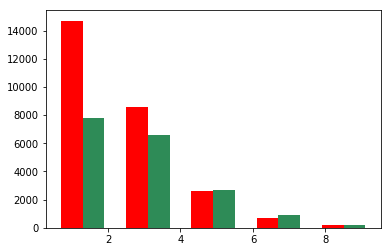

In [292]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['deepness'], bins=5, range=(1,10))
b_heights, b_bins = np.histogram(dfPositive['deepness'], bins=5, range=(1,10))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

### Medias

In [293]:
dfPositive["deepness"].mean()

3.1986943880629766

In [295]:
dfNegative["deepness"].mean()

2.693697055640557

### Medianas

In [296]:
dfPositive["deepness"].median()

3.0

In [297]:
dfNegative["deepness"].median()

2.0